In [8]:
library('ggplot2')
library('gganimate')
library('transformr')

ERROR: Error in library("transformr"): there is no package called ‘transformr’


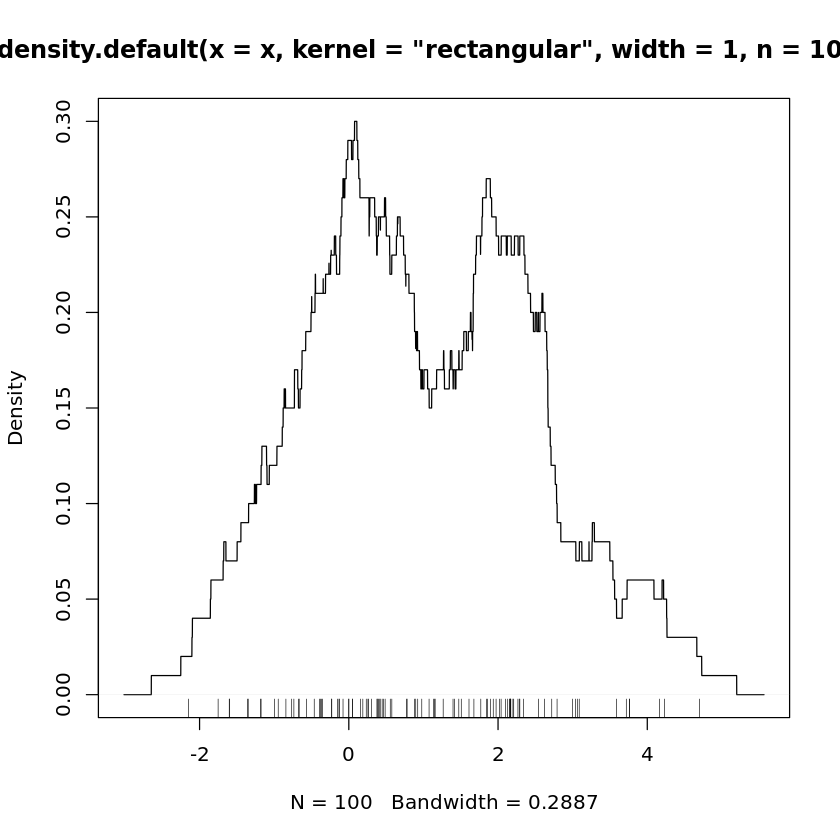

In [5]:
set.seed(2346639)
x <- c(rnorm(50), rnorm(50,2))
x = sort(x)
plot(density(x, kernel='rectangular', width=1, n = 10**4))
rug(x)

In [6]:
# kernel

bandwidth = 0.1
X = seq(-3, 3, length.out=100)
density = dnorm(X/bandwidth)/bandwidth
kdf = data.frame(cbind(X,density))

under_curve_limits = sort(X[(density>0.01)])
under_curve_limits = c(under_curve_limits[1], under_curve_limits[length(under_curve_limits)])
under_curve_limits

raw_data = data.frame(x)
raw_data$height = 0.1
raw_points_under_curve = (raw_data$x < under_curve_limits[2]) & (raw_data$x > under_curve_limits[1])
raw_data[raw_points_under_curve, 'height'] = dnorm(raw_data[raw_points_under_curve, 'x']/bandwidth)/bandwidth
raw_data$under_curve = 'no'
raw_data[raw_points_under_curve, 'under_curve'] = 'yes'
raw_data$under_curve = as.character(raw_data$under_curve)

ggplot(kdf, aes(x=X, y=density)) +  
    geom_line(color='red', size=1.5) +
    geom_segment(data=raw_data, aes(x=x, y=0, xend=x, yend=height, color=under_curve)) + 
    scale_color_manual(values=c('black', 'green')) +
    theme_bw() +
    theme(
        panel.background = element_rect(fill='white'),
        plot.margin = margin(1, 0.5, 2.5, 1, "cm"),
        #plot.background = element_rect(fill=theme_bg),
        plot.title=element_text(size=24, family="Arial", face="bold"),
        plot.subtitle=element_text(size=16),
        axis.title=element_text(size=18), 
        axis.text=element_text(size=16)
    )

[1] -0.3333333  0.3333333

ERROR: Error in ggplot(kdf, aes(x = X, y = density)): could not find function "ggplot"
